<a href="https://colab.research.google.com/github/gomesluiz/pln-na-pratica/blob/main/u4-02-hands-on-1-classificacao-de-texto-2-exploratory-data-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bug Severity Predictor for Mozilla

In this project, I'll build a severity predictor for the [Mozilla project](https://www.mozilla.org/en-US/) that uses the description of a bug report stored a in [Bugzilla Tracking System](https://bugzilla.mozilla.org/home) to predict its severity.

The severity in the Mozilla project indicates how severe the problem is – from blocker ("application unusable") to trivial ("minor cosmetic issue"). Also, this field can be used to indicate whether a bug is an enhancement request. In my project, I have considered five severity levels: **trivial(0)**, **minor(1)**, **major(2)**, **critical(3)**, and **blocker(4)**. I have ignored the default severity level (often **"normal"**) because this level is considered as a choice made by users when they are not sure about the correct severity level.

## Exploratory data analysis

This step in machine learning workflow will analyze the dataset to summarize their main characteristics using visual methods. In my project, I'll use a bar and word clouds charts.

### Project setup

The cell below declares the required packages.

In [3]:
# standard packages
import os

# third-party packages
import matplotlib.pyplot as plt
import numpy as np
import pandas  as pd
import seaborn as sns


In [11]:
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

def plot_word_cloud(reports, severities, max_len=128):
    """Plots word clouds by severity in the severities list.

    Args:
        reports (dataframe): a bug reports dataframe.
        severities (list)  : a list of severity levels list.
        max_len (int)      : max number of words in each cloud.

    """
    def do_plot(ax, severity):
        filtered = reports.loc[reports['severity_category']==severity]
        descriptions = filtered['long_description'].apply(
            (lambda s: ' '.join(s.split()[:max_len]))
        )
        descriptions = " ".join(
            description for description in descriptions
        )
        wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=max_len
                            , background_color="white").generate(descriptions)
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(severity)
        ax.grid(False)

    stopwords = set(STOPWORDS)
    if len(severities) > 1:
        fig, axs  = plt.subplots(nrows=1, ncols=len(severities), figsize=(20, 20))
        for ax, severity in zip(axs, severities):
            do_plot(ax, severity)
    else:
        fig, ax  = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
        do_plot(ax, severities[0])

### Read in the data

The cell below load the cleaned bug reports dataset. This dataset has the following attributes:

| **Attribute** | **Description** |
| :------------ | :-------------- |
| long_description |  The description of a report written when the bug report was opened. |
| severity_code | The target label that represents the bug severity level.|

In [5]:
from google.colab import drive
drive.mount ('/drive')

reports_input_path = cleaned_reports_path = os.path.join('..', 'drive', 'MyDrive', 'bug-report-classifier', 'data', 'clean')
reports_data = pd.read_csv(os.path.join(reports_input_path, 'mozilla_bug_report_data.csv'))

drive.flush_and_unmount()

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [6]:
reports_data.head()

,long_description,severity_category
0,is broken many users can t enter bugs on it p...,blocker
1,adding support for custom headers and cookie n...,blocker
2,the patch in bug regressed the fix from bug th...,major
3,from bugzilla helper user agent mozilla x u li...,major
4,i found it odd that relogin cgi didn t clear o...,minor


In [7]:
reports_data.shape

(2388, 2)

### Severity target label distribution

The cell below show the severity target label distibution in the dataset.

<ipython-input-9-c5ce30d95702>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.catplot(data=reports_data


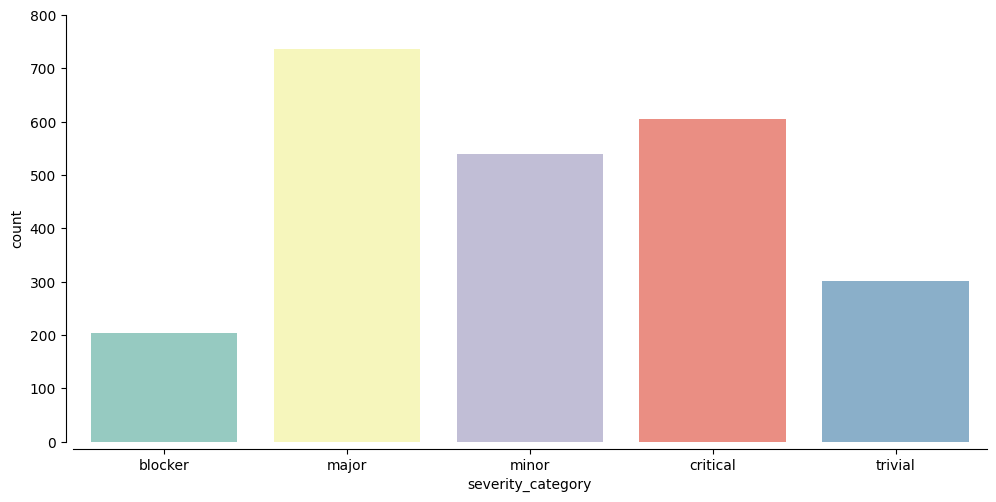

In [9]:
ax=sns.catplot(data=reports_data
              , x="severity_category"
              , height=5
              , aspect=2
              , kind="count"
              , palette="Set3")
sns.despine(offset=5)

ax.set(ylim=(0, 800))

**Conclusion:** The figure above shows that the severity level target-label in the dataset is unbalanced.

## Word cloud by bug severity level

The cell below plots the word clouds by the severity target, considering 128 words per cloud.

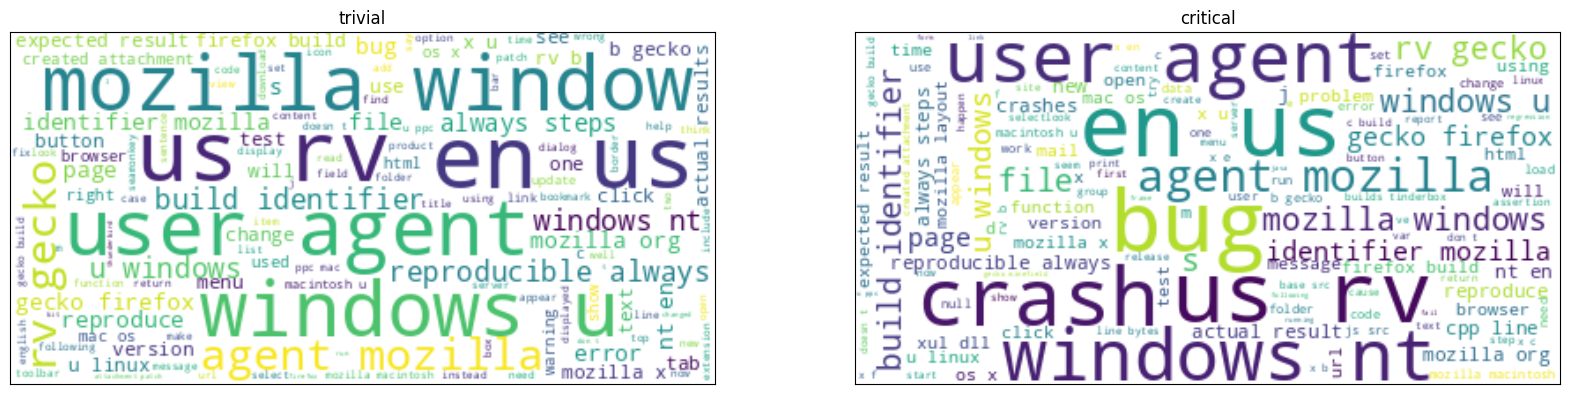

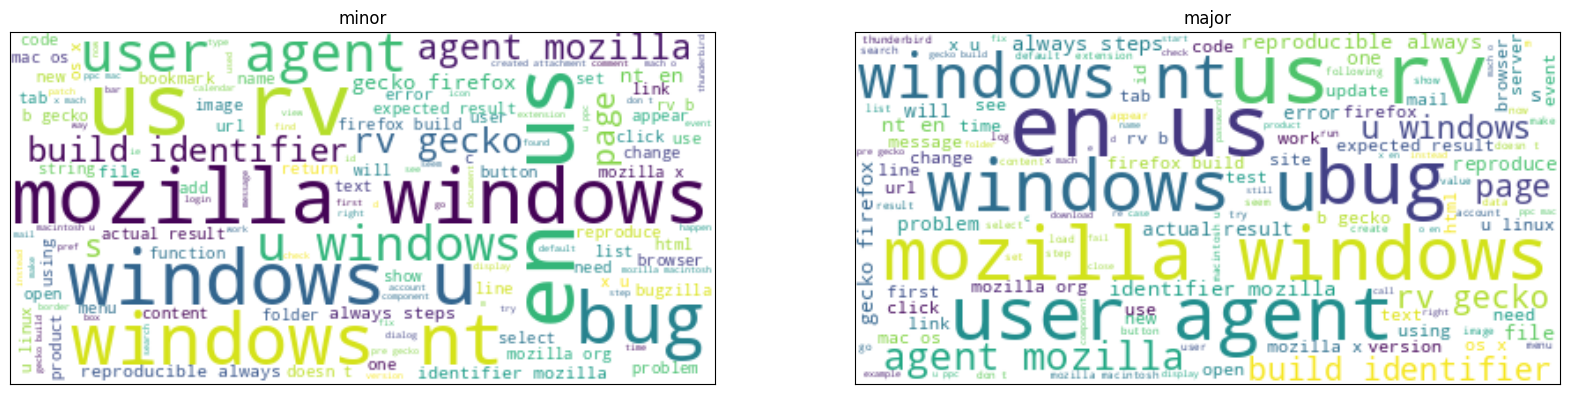

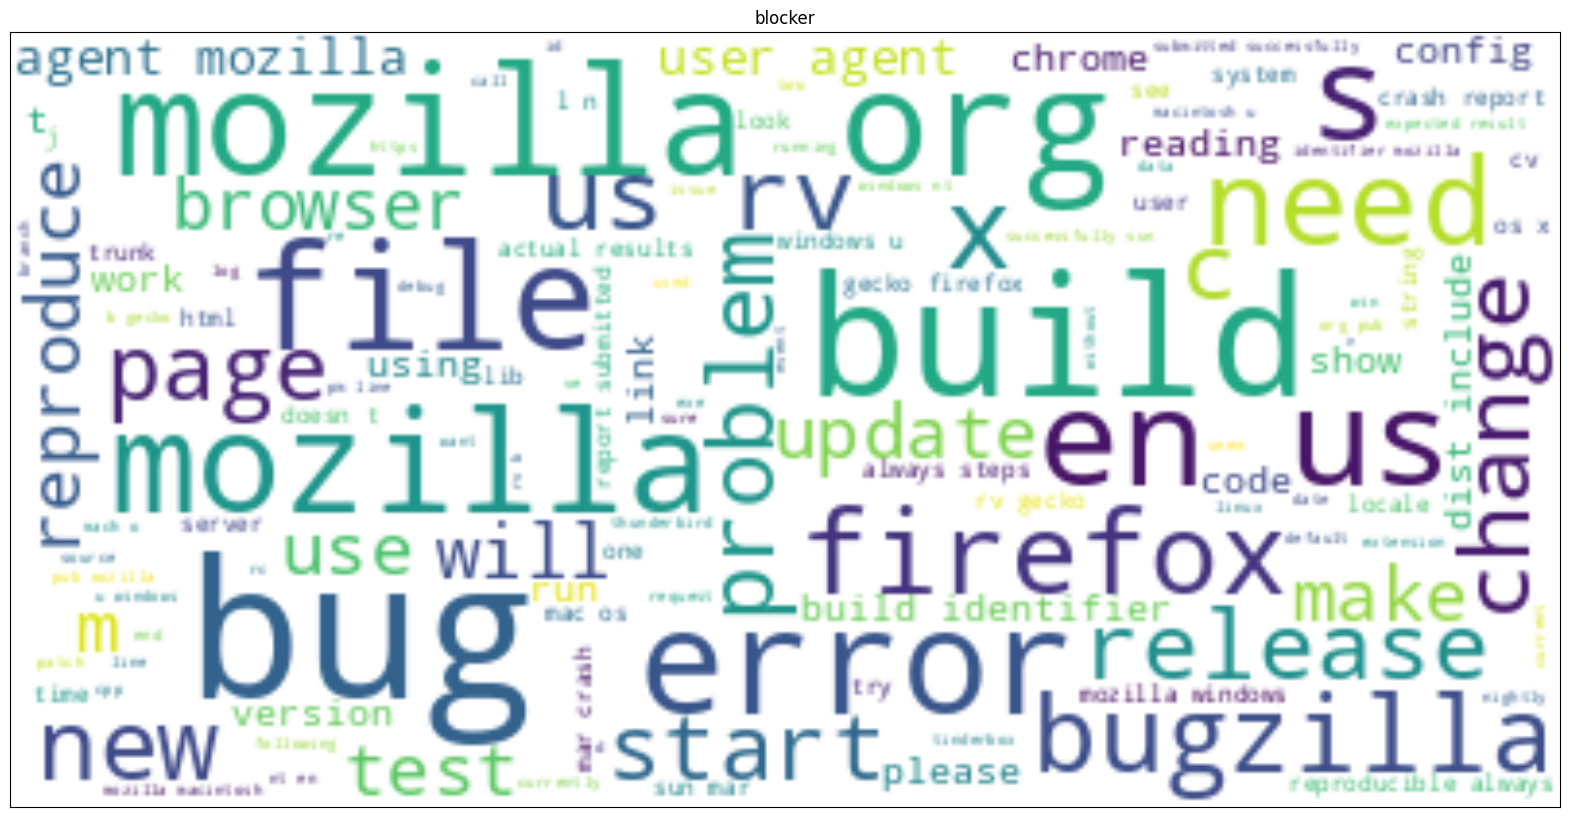

In [13]:
max_len=128
plot_word_cloud(reports_data, ['trivial', 'critical'], max_len)
plot_word_cloud(reports_data, ['minor', 'major'], max_len)
plot_word_cloud(reports_data, ['blocker'], max_len)

**Conclusion:** It seems that the word clouds above shows some differences according to severity level.